# Grafica de la variacion del ancho de banda respecto al tiempo

## Caracteristicas del experimento ##
1. Tasas de datos empleadas para cada ataque: 2kps, 4kps, 6kps, 8kps, 10kps.
2. Se lleva a cabo un caso normal en el cual no se lleva a cabo ningun ataque.
3. Para este caso se emplea solo una replica, es decir, los datos recolectados son los correspondientes a un solo experimento llevado a cabo.

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import os

metricas = {'iperf':{},'ping':{}}

baseDir = './csv_50_1/'
files = os.listdir(baseDir)
for e in files:
    k = e.strip('csv')
    k = k.strip('.')
    k = k.split('_')[-1]
    if 'ping' in e:
        metricas['ping'][k] = pd.read_csv(baseDir + e,sep=';')
            
    else:
        metricas['iperf'][k] = pd.read_csv(baseDir + e,sep=';', index_col=0)
        

SyntaxError: invalid syntax (<ipython-input-125-1f92741f60fa>, line 16)

## Graficas de ancho de banda ##

**Captura de un dataframe para una tasa de 6kpps**

In [28]:
print(metricas['iperf']['6kpps'])

                Transfer [GBytes]  Bandwidth [Mbits/sec]
Interval [sec]                                          
0.0-1.0                     12.60                  106.0
1.0-2.0                     11.90                   99.6
2.0-3.0                     13.60                  114.0
3.0-4.0                     11.00                   92.3
4.0-5.0                     13.90                  116.0
5.0-6.0                     11.20                   94.4
6.0-7.0                     13.00                  109.0
7.0-8.0                     11.20                   94.4
8.0-9.0                     12.20                  103.0
9.0-10.0                    11.90                   99.6
10.0-11.0                    7.88                   66.1
11.0-12.0                   11.90                   99.6
12.0-13.0                   11.80                   98.6
13.0-14.0                   11.80                   98.6
14.0-15.0                   11.90                   99.6
15.0-16.0                   11.

In [31]:
bw = metricas['iperf']['6kpps']['Bandwidth [Mbits/sec]']
print(bw)
print(type(bw))

Interval [sec]
0.0-1.0      106.0
1.0-2.0       99.6
2.0-3.0      114.0
3.0-4.0       92.3
4.0-5.0      116.0
5.0-6.0       94.4
6.0-7.0      109.0
7.0-8.0       94.4
8.0-9.0      103.0
9.0-10.0      99.6
10.0-11.0     66.1
11.0-12.0     99.6
12.0-13.0     98.6
13.0-14.0     98.6
14.0-15.0     99.6
15.0-16.0     99.6
16.0-17.0     65.0
17.0-18.0     99.6
18.0-19.0     99.6
19.0-20.0    101.0
20.0-21.0     99.6
21.0-22.0    101.0
22.0-23.0     66.1
23.0-24.0    101.0
24.0-25.0     99.6
25.0-26.0     99.6
26.0-27.0     98.6
27.0-28.0     66.1
28.0-29.0     99.6
29.0-30.0    114.0
30.0-31.0     66.1
31.0-32.0     98.6
32.0-33.0     99.6
33.0-34.0     99.6
34.0-35.0     98.6
35.0-36.0     98.6
36.0-37.0     70.3
37.0-38.0     98.6
38.0-39.0     99.6
39.0-40.0     98.6
40.0-41.0     99.6
41.0-42.0     97.5
42.0-43.0     69.2
43.0-44.0     99.6
44.0-45.0     99.6
45.0-46.0    101.0
46.0-47.0     99.6
47.0-48.0     67.1
48.0-49.0     98.6
49.0-50.0     98.6
Name: Bandwidth [Mbits/sec], dtype:

Text(0,0.5,'Ancho de banda [Mbits/sec]')

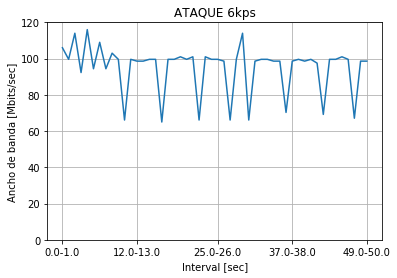

In [50]:
axes = bw.plot(ylim = [0,120],grid = True, xticks = [0,50//4,50//2,50*3//4,49],title='ATAQUE 6kps')
axes.set_ylabel('Ancho de banda [Mbits/sec]')


**Grafica de los anchos de banda**

dict_keys(['4kpps', '6kpps', '10kpps', '8kpps', 'iperfnormal', '2kpps'])


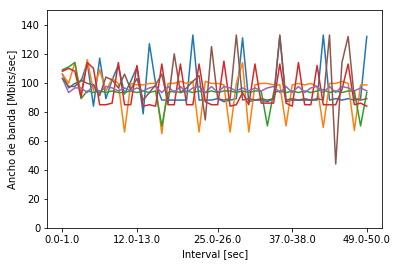

In [77]:
bw = metricas['iperf']
bw_metrics = {}
for k in bw:
    bw_metrics[k] = bw[k]['Bandwidth [Mbits/sec]']

ban = True
for k in bw_metrics:
    if ban:
        axes = bw_metrics[k].plot(ylim = [0,150],grid = True, xticks = [0,50//4,50//2,50*3//4,49])
        
        ban = False 
    else:
        bw_metrics[k].plot(ax=axes)
axes.set_ylabel('Ancho de banda [Mbits/sec]')

print(indices)
#axes = bw_metrics.plot(ylim = [0,120],grid = True, xticks = [0,50//4,50//2,50*3//4,49],title='ATAQUE 6kps')
#list = bw_metrics[0]
#axes = bw_metrics.plot(ylim = [0,120],grid = True, xticks = [0,50//4,50//2,50*3//4,49],title='ATAQUE 6kps')

#['6kpps']['Bandwidth [Mbits/sec]']

In [78]:
df_bw = pd.DataFrame(columns=indices)
print(df_bw)

Empty DataFrame
Columns: [4kpps, 6kpps, 10kpps, 8kpps, iperfnormal, 2kpps]
Index: []


In [79]:
for k in df_bw:  
    df_bw[k] = bw_metrics[k]
    #print(df[k])
print(df_bw)
#df1['e'] = Series(np.random.randn(sLength), index=df1.index)

                4kpps  6kpps  10kpps  8kpps  iperfnormal  2kpps
Interval [sec]                                                 
0.0-1.0         106.0  106.0   109.0  108.0        103.0  103.0
1.0-2.0          96.5   99.6   111.0  110.0         93.3   97.5
2.0-3.0          99.6  114.0   114.0  108.0         96.5   97.5
3.0-4.0         101.0   92.3    89.1   90.2         96.5  102.0
4.0-5.0         114.0  116.0    94.4  114.0         93.3   99.6
5.0-6.0          83.9   94.4    93.3  110.0         98.6   98.6
6.0-7.0         117.0  109.0    94.4   84.9         93.3   91.2
7.0-8.0          89.1   94.4    93.3   84.9         97.5  104.0
8.0-9.0         102.0  103.0    94.4   86.0         96.5  102.0
9.0-10.0        112.0   99.6    93.3  114.0         94.4   96.5
10.0-11.0        92.3   66.1    93.3   84.9         96.5  106.0
11.0-12.0       101.0   99.6    94.4   84.9         94.4   95.4
12.0-13.0       111.0   98.6    93.3  112.0         96.5  103.0
13.0-14.0        78.6   98.6    94.4   8

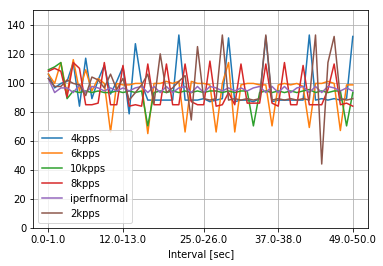

In [80]:
axes = df_bw.plot(ylim = [0,150],grid = True, xticks = [0,50//4,50//2,50*3//4,49])

## Graficas delay ##

In [117]:
#ping_delay = metricas['ping']['6kpps']['time [ms]']
ping_delay = metricas['ping']
delay_metrics = {}
for k in ping_delay:
    delay_metrics[k] = ping_delay[k]['time [ms]']    
#print(delay_metrics)
indices_delay = delay_metrics.keys()
df_delay = pd.DataFrame(columns=indices_delay)

In [121]:
print(df_delay)
for k in df_delay:  
    if k != 'pingnormal':
        df_delay[k] = delay_metrics[k]
    #print(k)
    #print(df_delay[k]) 
    #print(delay_metrics[k])
    #print()

          4kpps  6kpps  10kpps  8kpps  2kpps pingnormal
icmp_seq                                               
64        4.630  4.380   4.550  4.980  6.440        NaN
64        0.155  0.154   0.178  0.122  0.180        NaN
64        0.033  0.025   0.033  0.150  0.101        NaN
64        0.027  0.028   0.037  0.032  0.029        NaN
64        0.033  0.028   0.033  0.038  0.033        NaN
64        0.033  0.024   0.029  0.030  0.041        NaN
64        0.036  0.027   0.030  0.023  0.030        NaN
64        0.028  0.027   0.036  0.029  0.037        NaN
64        0.032  0.023   0.029  0.034  0.043        NaN
64        0.031  0.034   0.030  0.025  0.035        NaN
64        0.039  0.039   0.025  0.030  0.033        NaN
64        0.030  0.022   0.029  0.035  0.039        NaN
64        0.031  0.025   0.031  0.025  0.032        NaN
64        0.034  0.028   0.023  0.030  0.050        NaN
64        0.030  0.031   0.026  0.026  0.039        NaN
64        0.024  0.026   0.032  0.022  0.032    

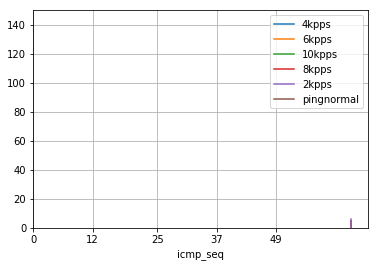

In [123]:
axes = df_delay.plot(ylim = [0,150],grid = True, xticks = [0,50//4,50//2,50*3//4,49])